In [4]:
list_available_datasets()
list_available_datasets(filter='aim-ahead')   # only list datasets for AIM-AHEAD project
list_available_datasets(search='diabe')

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

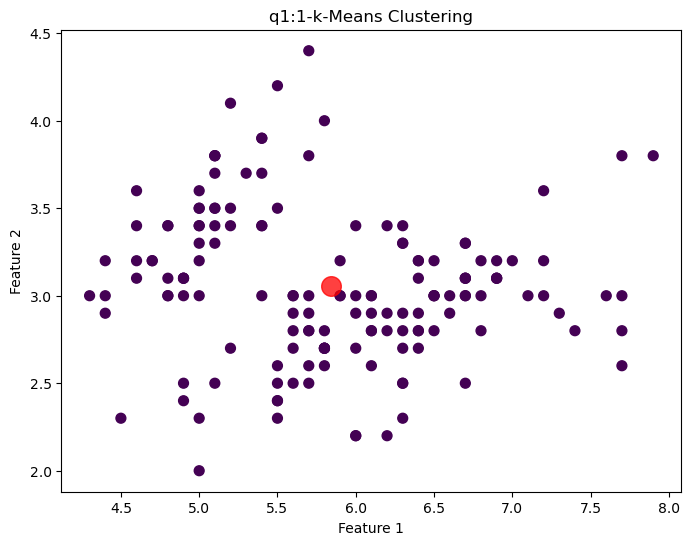

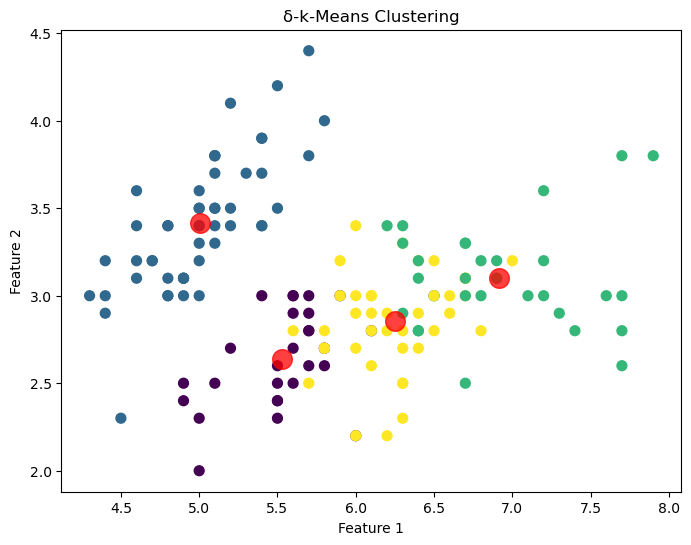

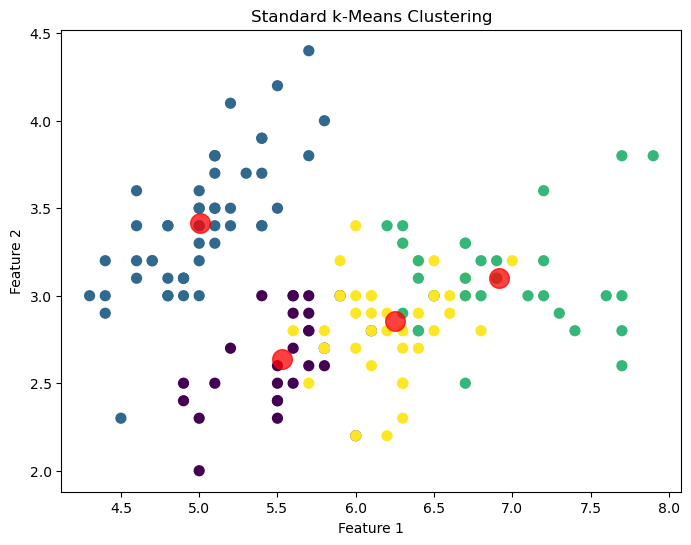

In [4]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset from URL
url = 'https://archive.ics.uci.edu/static/public/53/data.csv'
data = pd.read_csv(url)

# Drop non-numeric columns if necessary
# Adjust this based on your dataset structure
data = data.select_dtypes(include=np.number)

# Handle NaN values
data = data.dropna()

# Implement q1:1-k-Means
def q1_1_k_means(data):
    centroid = np.mean(data, axis=0, keepdims=True)
    kmeans = KMeans(n_clusters=1, init=centroid, n_init=1)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

# Implement δ-k-Means
def delta_k_means(data, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

# Perform standard k-Means clustering
def standard_k_means(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.cluster_centers_

# Plotting function to visualize clusters
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Convert dataset to numpy array
X = data.values

# Perform q1:1-k-Means clustering
q1_1_labels, q1_1_centers = q1_1_k_means(X)
plot_clusters(X, q1_1_labels, q1_1_centers, 'q1:1-k-Means Clustering')

# Perform δ-k-Means clustering
delta_k_labels, delta_k_centers = delta_k_means(X, k=4)
plot_clusters(X, delta_k_labels, delta_k_centers, 'δ-k-Means Clustering')

# Perform standard k-Means clustering
standard_k_labels, standard_k_centers = standard_k_means(X, k=4)
plot_clusters(X, standard_k_labels, standard_k_centers, 'Standard k-Means Clustering')


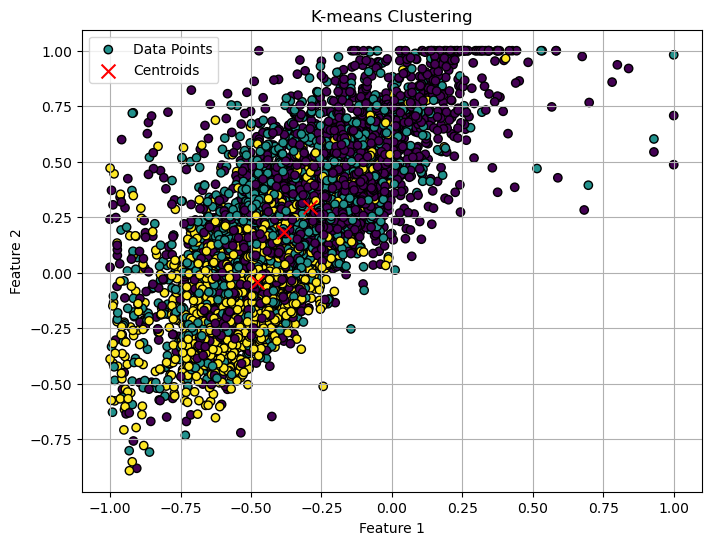

Final centroids:
[[-0.28917187  0.29440097  0.5001718  ...  0.08406302 -0.28984725
  21.58147321]
 [-0.3845406   0.18318922  0.42052655 ...  0.04884836 -0.30257207
   4.84525862]
 [-0.47884604 -0.04165271  0.1392867  ...  0.10582625 -0.25569114
  12.91609896]]
Clusters:
[1 1 1 ... 0 0 0]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from URL
url = 'https://archive.ics.uci.edu/static/public/54/data.csv'
data = pd.read_csv(url)

# Drop non-numeric columns if necessary
# Adjust this based on your dataset structure
data = data.select_dtypes(include=np.number)

# Handle NaN values
data = data.dropna()

# Convert dataset to numpy array
X = data.values

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices]
    return centroids

# Function to compute distance between points and centroids
def compute_distances(X, centroids):
    distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
    return distances

# Function to assign points to clusters based on distances
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    clusters = np.argmin(distances, axis=1)
    return clusters

# Function to update centroids based on current clusters
def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids

# Function to perform K-means clustering
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Run K-means clustering algorithm
k = 3
centroids, clusters = kmeans(X, k)

# Plotting results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("Final centroids:")
print(centroids)
print("Clusters:")
print(clusters)
